In [ ]:
import gdown
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#url = https://drive.google.com/file/d/1WSKBwH8i5WaPga5B21u1C-zRcznia5D-/view

url ="https://drive.google.com/uc?id=1WSKBwH8i5WaPga5B21u1C-zRcznia5D-"
gdown.download(url, output="mi_base2.csv", quiet=True)

bd = pd.read_csv("mi_base2.csv", index_col=0)
bd['Date'] = pd.to_datetime(bd['Date'], format = '%Y-%m-%d')

bd.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
import gdown
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#url = https://drive.google.com/file/d/1jto3lMaOtyecrVS7Uwuvo9oS7SNJEGbW/view?usp=sharing

url ="https://drive.google.com/uc?id=1jto3lMaOtyecrVS7Uwuvo9oS7SNJEGbW"
gdown.download(url, output="mi_base2.csv", quiet=True)

bd = pd.read_csv("mi_base2.csv", index_col=0)
bd.head()

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0


In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
bd.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:

corr = bd.set_index('AveragePrice').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))

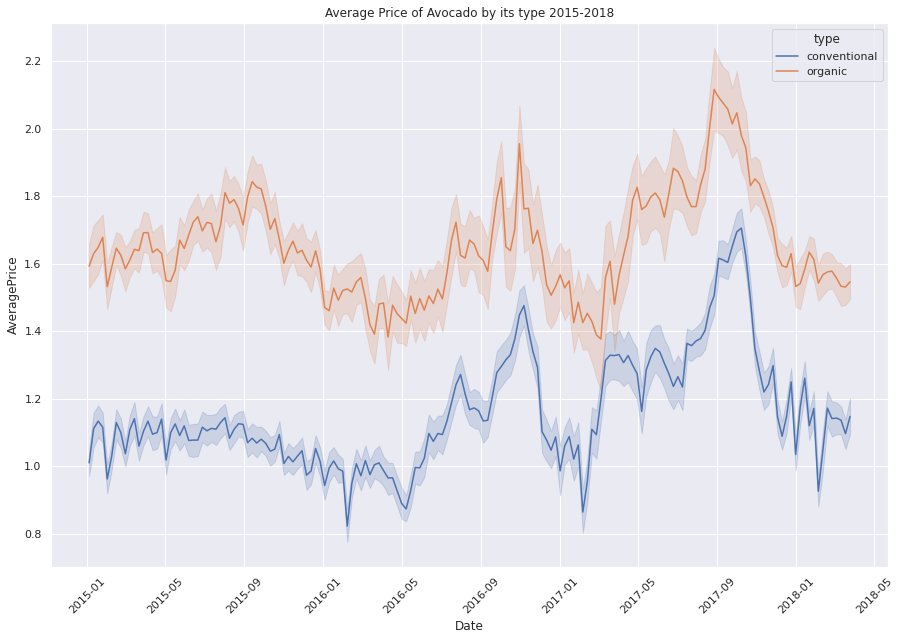

In [ ]:
ax = sns.set(rc={'figure.figsize':(15,10)})

plt.title('Average Price of Avocado by its type 2015-2018')
plt.xticks(rotation =45)
ax = sns.lineplot(x="Date",y="AveragePrice", hue='type', data=bd)


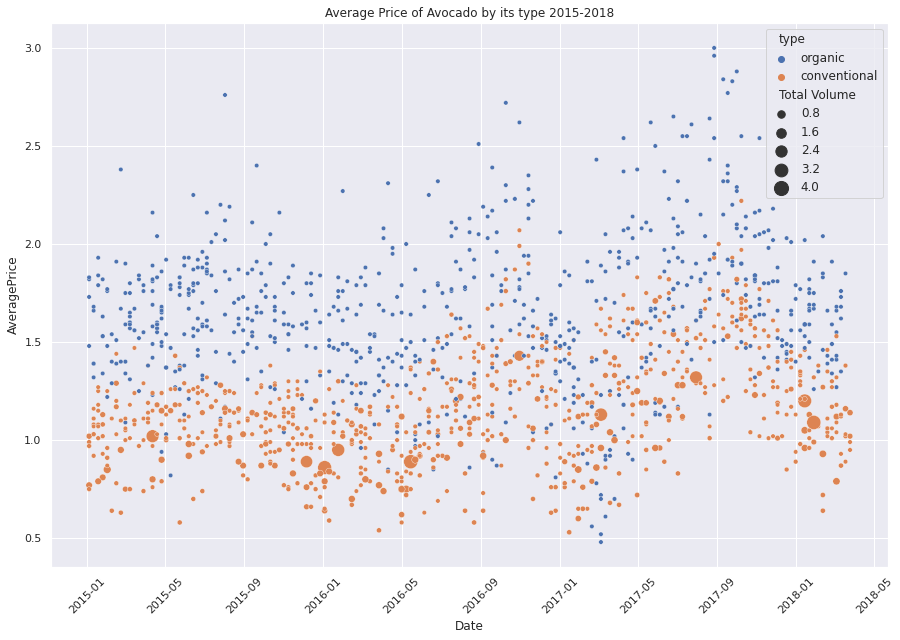

In [ ]:
bd_sample=bd.sample(1500)

plt.title('Average Price of Avocado by its type 2015-2018')
ax = sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation =45)
ax = sns.scatterplot(x="Date", y="AveragePrice", data=bd_sample, color = 'green', hue = 'type', size = 'Total Volume', sizes=(20, 200))

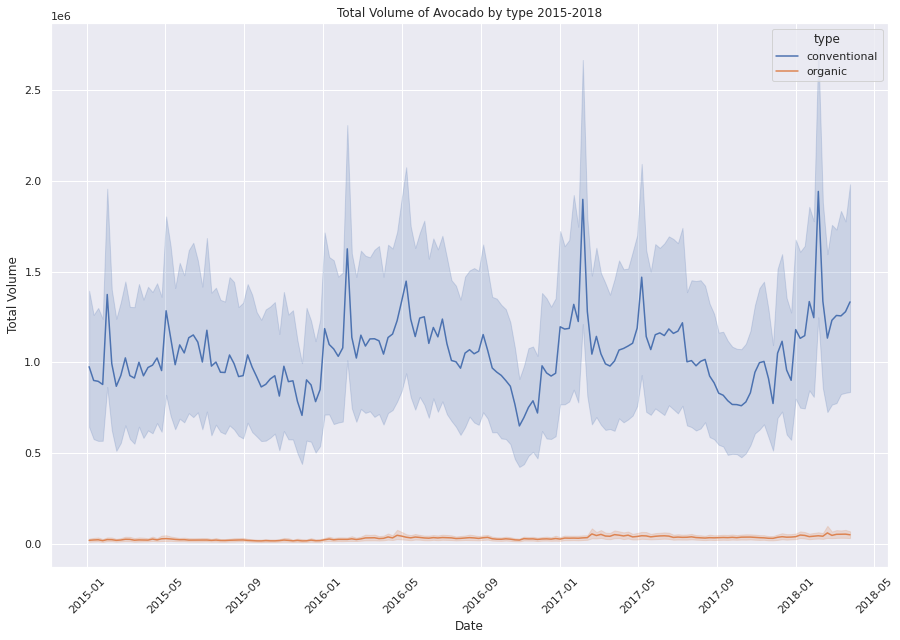

In [ ]:
plt.title('Total Volume of Avocado by type 2015-2018')
ax2 = sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation =45)
sr = bd[bd['region']!= 'TotalUS']

ax2 = sns.lineplot(x="Date",y="Total Volume", hue='type', data=sr)

Text(0, 0.5, 'Average Price')

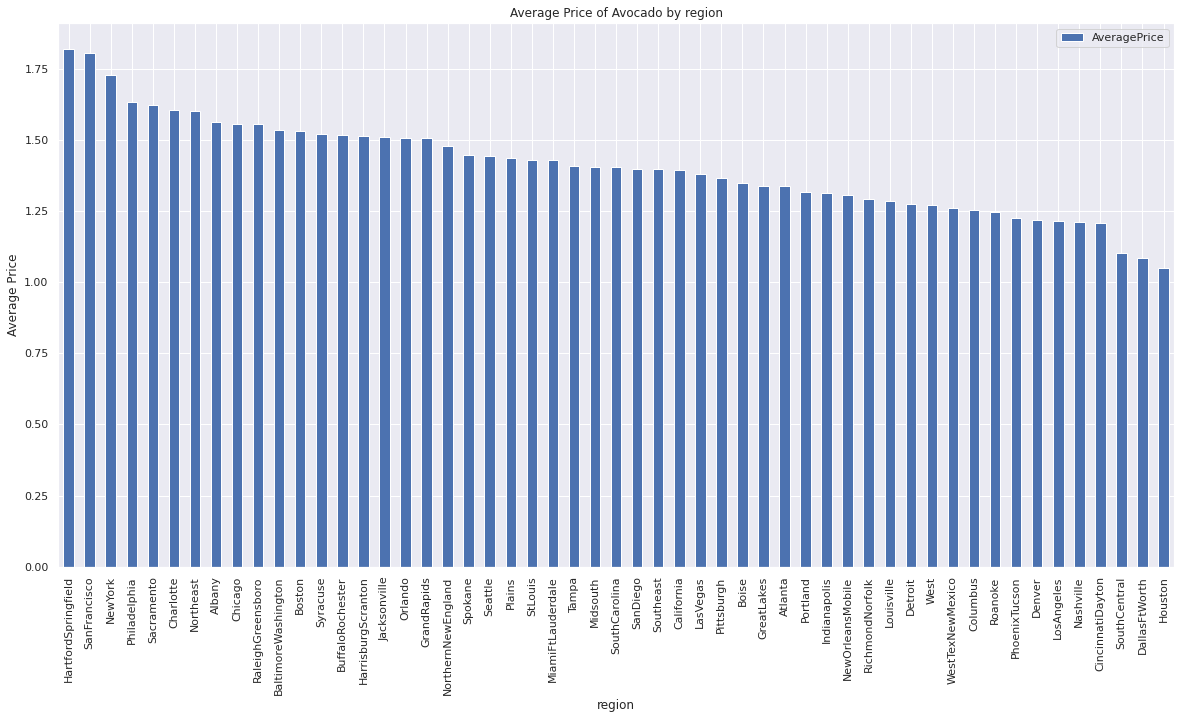

In [ ]:
#precio promedio por región
sr = bd[bd['region']!= 'TotalUS']

ax = sns.set(rc={'figure.figsize':(20,10)})
bd_grouped = sr.groupby(['region']).mean()[['AveragePrice']]
bd_grouped2 = bd_grouped.sort_values(by='AveragePrice', ascending= False)
bd_grouped2.plot(kind='bar')
plt.title('Average Price of Avocado by region')
plt.ylabel('Average Price')

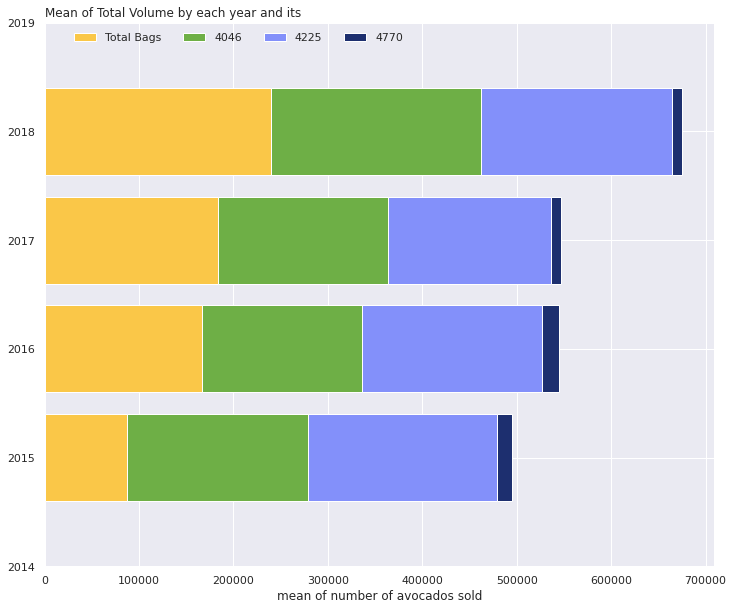

In [ ]:
sr = bd[bd['region']!= 'TotalUS']
#Primero agrupé los valores en cuanto el promedio de de ventas promedio por año y en distintas categorías para observar como se compone el total de ventas.
bd_grouped = sr.groupby(['year']).mean()[['Total Volume',"4046","4225","4770",'Total Bags']]

#El diagrama lo realicé gracias a un tutorial que seguí.
fields = ['Total Bags', "4046","4225","4770"]
colors = ['#FAC748', '#6EAF46', '#8390FA', '#1D2F6F']

fig, ax = plt.subplots(1, figsize=(12, 10))
left = len(bd_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(bd_grouped.index, bd_grouped[name], left = left, color=colors[idx])
    left = left + bd_grouped[name]

plt.title('Mean of Total Volume by each year and its ', loc='left')
plt.legend(fields, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('mean of number of avocados sold')

plt.ylim(top=2019, bottom=2014)
ax.set_axisbelow(True)
ax.xaxis.grid(color='white')

In [ ]:
#Agrupamiento de los datos obteniendo el promedio de las ventas por año de las regiones en donde hubo ventas totales máximas.
ms = bd[bd.region.isin(['West','California','SouthCentral','Southeast','Midsouth'])]
bd_grouped = ms.groupby(['region','year']).mean()[["Total Volume","4046","4225","4770",'Total Bags']].reset_index()
bd_grouped

,region,year,Total Volume,4046,4225,4770,Total Bags
0,California,2015,2.898148e+06,1.398993e+06,1.042169e+06,100619.863750,3.563665e+05
1,California,2016,3.136427e+06,1.041000e+06,1.053771e+06,117620.314615,9.240350e+05
2,California,2017,2.996646e+06,1.084428e+06,9.919572e+05,72741.968585,8.475192e+05
3,California,2018,3.489221e+06,1.260764e+06,1.181923e+06,59725.763333,9.868085e+05
4,Midsouth,2015,1.348288e+06,2.968152e+05,6.305676e+05,104410.117500,3.164948e+05
5,Midsouth,2016,1.483274e+06,3.189194e+05,6.846229e+05,58479.632500,4.212520e+05
6,Midsouth,2017,1.561826e+06,3.341765e+05,6.471701e+05,16727.214906,5.637516e+05
7,Midsouth,2018,2.013058e+06,4.571471e+05,7.080508e+05,13264.106250,8.345955e+05
8,SouthCentral,2015,2.792833e+06,1.568292e+06,8.249520e+05,53238.575000,3.463496e+05
9,SouthCentral,2016,2.924026e+06,1.522141e+06,6.052767e+05,135277.173173,6.613316e+05


Text(0, 0.5, 'Total Sales of Avocado (*10^6)')

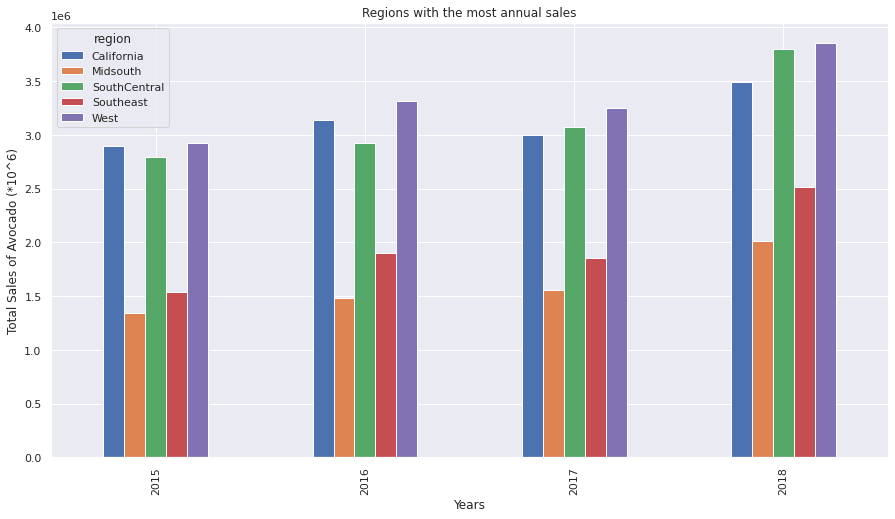

In [ ]:
#index = [2, 11, 12]
#bd_grouped = ms.iloc[:,index]
#.unstack().reset_index()
bd_grouped.pivot(index='year', columns='region',values='Total Volume').plot(kind='bar', figsize=(15,8))
plt.title('Regions with the most annual sales')
plt.xlabel('Years')
plt.ylabel('Total Sales of Avocado (*10^6)')

In [ ]:
bd['region'][0]

0                 Albany
0                Atlanta
0    BaltimoreWashington
0                  Boise
0                 Boston
            ...         
0               Syracuse
0                  Tampa
0                TotalUS
0                   West
0       WestTexNewMexico
Name: region, Length: 432, dtype: object

In [ ]:
#bd.groupby('region').apply(lambda df : df.year.iloc[0])